<a href="https://colab.research.google.com/github/Felipezcanal/ann/blob/main/Rede_Perceptron(3%20entradas).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

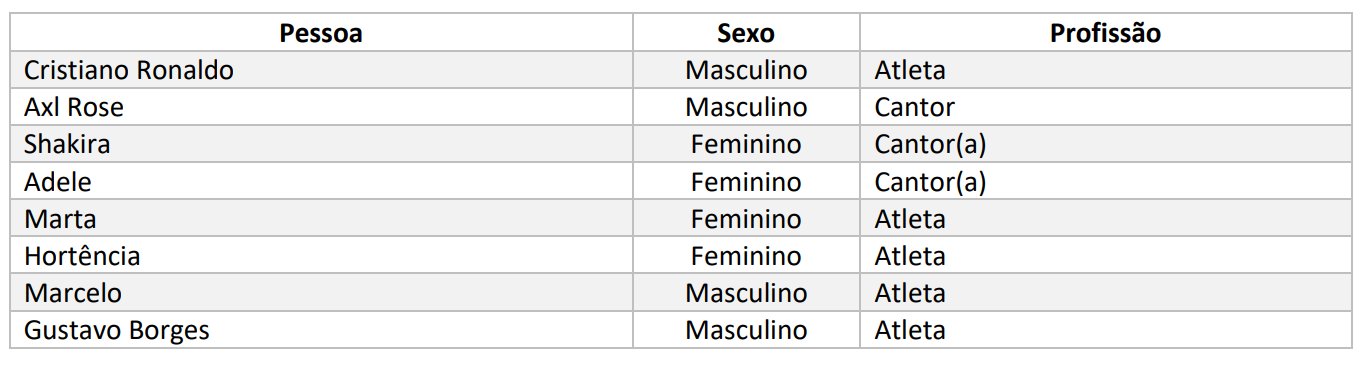




Os dados foram codificados da seguinte forma (garantindo que sejam linearmente separaveis):

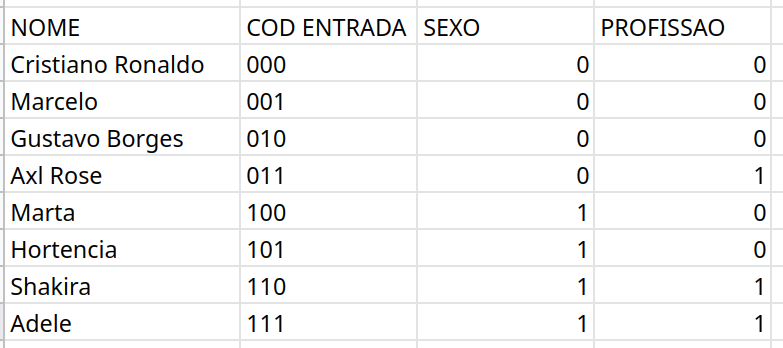

In [25]:
import numpy as np

In [ ]:
class Perceptron():
  def __init__(self, dados_treinamento, taxa_aprendizado = 1, tamanho_entrada = 2, neuronios = 1):
    self.taxa_aprendizado = taxa_aprendizado
    self.pesos_sinapticos = np.zeros((neuronios, tamanho_entrada))
    self.w_bias = np.ones(neuronios)
    self.dados_treinamento = dados_treinamento
    self.neuronios = neuronios

  def calcular(self, entradas):
    saidas = []
    for neuronio in range(self.neuronios):
      propagacao = self.calcular_propagacao(entradas, neuronio)
      saidas.append(self.calcular_ativacao(propagacao))
    return saidas

  def calcular_propagacao(self, entradas, neuronio):
    soma = 0
    for i, entrada in enumerate(entradas):
      soma += self.pesos_sinapticos[neuronio][i] * entrada
    return soma + self.w_bias[neuronio]

  def calcular_ativacao(self, propagacao):
    if propagacao > 0:
      return 1
    return 0
    
  def calcular_erro(self, saida_esperada, saida_calculada):
    erro = []
    for i in range(self.neuronios):
      erro.append(saida_esperada[i] - saida_calculada[i])
    return erro

  def atualizar_pesos(self, erro, entradas):
    for neuronio in range(self.neuronios):
      for i, peso in enumerate(self.pesos_sinapticos[neuronio]):
        self.pesos_sinapticos[neuronio][i] = int(peso + self.regra_delta(erro[neuronio], entradas[i]))
      self.w_bias[neuronio] = int(self.w_bias[neuronio] + (self.taxa_aprendizado * erro[neuronio] * 1))
    print('atualizou peso', self.pesos_sinapticos, self.w_bias)
  
  def regra_delta(self, erro, entrada):
    return self.taxa_aprendizado * erro * entrada

  def treinar(self):
    continuar_treino = True
    epoca = 1
    while continuar_treino:
      print(f'epoca: {epoca}')
      epoca += 1
      continuar_treino = False
      for i, dado in self.dados_treinamento.items():
        saida_calculada = self.calcular(dado['entradas'])
        erro = self.calcular_erro(dado['saida'], saida_calculada)
        print(f'erro: {erro}')

        tem_erro = False
        for e in erro:
          if e != 0:
            tem_erro = True
            break

        if (tem_erro):
          continuar_treino = True
          self.atualizar_pesos(erro, dado['entradas'])
      print()





In [26]:
dados = {
    0: {
        'entradas': [0, 0, 0],
        'saida': [0, 0]
    },
    1: {
        'entradas': [0, 0, 1],
        'saida': [0, 0]
    },
    2: {
        'entradas': [0, 1, 0],
        'saida': [0, 0]
    },
    3: {
        'entradas': [0, 1, 1],
        'saida': [0, 1]
    },
    4: {
        'entradas': [1, 0, 0],
        'saida': [1, 0]
    },
    5: {
        'entradas': [1, 0, 1],
        'saida': [1, 0]
    },
    6: {
        'entradas': [1, 1, 0],
        'saida': [1, 1]
    },
    7: {
        'entradas': [1, 1, 1],
        'saida': [1, 1]
    }
}

p = Perceptron(dados_treinamento = dados, tamanho_entrada=3, neuronios=2)
p.treinar()


epoca: 1
erro: [-1, -1]
atualizou peso [[0. 0. 0.]
 [0. 0. 0.]] [0. 0.]
erro: [0, 0]
erro: [0, 0]
erro: [0, 1]
atualizou peso [[0. 0. 0.]
 [0. 1. 1.]] [0. 1.]
erro: [1, -1]
atualizou peso [[ 1.  0.  0.]
 [-1.  1.  1.]] [1. 0.]
erro: [0, 0]
erro: [0, 1]
atualizou peso [[1. 0. 0.]
 [0. 2. 1.]] [1. 1.]
erro: [0, 0]

epoca: 2
erro: [-1, -1]
atualizou peso [[1. 0. 0.]
 [0. 2. 1.]] [0. 0.]
erro: [0, -1]
atualizou peso [[1. 0. 0.]
 [0. 2. 0.]] [ 0. -1.]
erro: [0, -1]
atualizou peso [[1. 0. 0.]
 [0. 1. 0.]] [ 0. -2.]
erro: [0, 1]
atualizou peso [[1. 0. 0.]
 [0. 2. 1.]] [ 0. -1.]
erro: [0, 0]
erro: [0, 0]
erro: [0, 0]
erro: [0, 0]

epoca: 3
erro: [0, 0]
erro: [0, 0]
erro: [0, -1]
atualizou peso [[1. 0. 0.]
 [0. 1. 1.]] [ 0. -2.]
erro: [0, 1]
atualizou peso [[1. 0. 0.]
 [0. 2. 2.]] [ 0. -1.]
erro: [0, 0]
erro: [0, -1]
atualizou peso [[ 1.  0.  0.]
 [-1.  2.  1.]] [ 0. -2.]
erro: [0, 1]
atualizou peso [[1. 0. 0.]
 [0. 3. 1.]] [ 0. -1.]
erro: [0, 0]

epoca: 4
erro: [0, 0]
erro: [0, 0]
erro: [0, -1

In [ ]:
print('saida para [0,0,0] : ', p.calcular([0,0,0]))
print('saida para [0,0,1] : ', p.calcular([0,0,1]))
print('saida para [0,1,0] : ', p.calcular([0,1,0]))
print('saida para [0,1,1] : ', p.calcular([0,1,1]))
print('saida para [1,0,0] : ', p.calcular([1,0,0]))
print('saida para [1,0,1] : ', p.calcular([1,0,1]))
print('saida para [1,1,0] : ', p.calcular([1,1,0]))
print('saida para [1,1,1] : ', p.calcular([1,1,1]))

saida para [0,0,0] :  [0, 0]
saida para [0,0,1] :  [0, 0]
saida para [0,1,0] :  [0, 0]
saida para [0,1,1] :  [0, 1]
saida para [1,0,0] :  [1, 0]
saida para [1,0,1] :  [1, 0]
saida para [1,1,0] :  [1, 1]
saida para [1,1,1] :  [1, 1]
